# New York State Drive Clean

### By: Shireen Talaat

# Introduction

New York State’s Charge NY initiative offers electric car buyers the Drive Clean Rebate of up to $2,000 for new car purchases or leases.
The rebate amount depends on the battery-only range of each vehicle.
Dealers enrolled in the program deduct the eligible amount from the vehicle price at the point of sale and then submit a rebate application with NYSERDA. 
This dataset includes all completed rebate applications as of the data through date.
The New York State Energy Research and Development Authority (NYSERDA) offers objective information and analysis, innovative programs, technical expertise, and support to help New Yorkers increase energy efficiency, save money, use renewable energy, and accelerate economic growth. 
Reduce reliance on fossil fuels.


Want to get a closer look at an electric vehicle and learn about the benefits of owning one? Let's take a closer look at this dataset. 
-	The Data source is:  https://catalog.data.gov/dataset/nyserda-electric-vehicle-drive-clean-rebate-data-beginning-2017

-	Original data size (43421 row by 11 columns). 




## Explanatory model 

In this model I will investigate the dataset and look for: 

- What is the most popular make?
- What is the preferred car for each county?
- What is the Annual GHG Emissions Reductions (MT CO2e) per car make?
- What is the Annual Petroleum Reductions (gallons) per car make?
- What is the Annual GHG Emissions Reductions (MT CO2e) per County?
- What is the Annual Petroleum Reductions (gallons) per County?
- Top Counties that are using Electric Vehicle.
- Rebate Amount in (USD) Vs Transaction Type. 
- Number of EV Type per Make
- Annual GHG Emissions Reductions in (MT CO2e) per Make and EV Type
- Annual Petroleum Reductions in (gallons) per Make and EV type

In [9]:
# The code was removed by Watson Studio for sharing.

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,07/09/2021,10/08/2020,Tesla,Model 3,NaN,10549,BEV,Purchase,2.99,592.89,2000.0
1,07/09/2021,10/09/2020,Nissan,LEAF,NaN,14623,BEV,Lease,2.91,592.89,2000.0
2,07/09/2021,10/14/2020,Tesla,Model X,NaN,10956,BEV,Purchase,2.52,592.89,500.0
3,07/09/2021,10/21/2020,Tesla,Model X,NaN,11747,BEV,Lease,2.52,592.89,500.0
4,07/09/2021,10/21/2020,Tesla,Model Y,NaN,10014,BEV,Purchase,3.07,592.89,2000.0


#### In the next few lines I wil be exploring the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43422 entries, 0 to 43421
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Data through Date                          43422 non-null  object 
 1   Submitted Date                             43422 non-null  object 
 2   Make                                       43422 non-null  object 
 3   Model                                      43422 non-null  object 
 4   County                                     43394 non-null  object 
 5   ZIP                                        43422 non-null  int64  
 6   EV Type                                    43422 non-null  object 
 7   Transaction Type                           43421 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  43422 non-null  float64
 9   Annual Petroleum Reductions (gallons)      43422 non-null  float64
 10  Rebate Amount (USD)   

In [3]:
df.dtypes

Data through Date                             object
Submitted Date                                object
Make                                          object
Model                                         object
County                                        object
ZIP                                            int64
EV Type                                       object
Transaction Type                              object
Annual GHG Emissions Reductions (MT CO2e)    float64
Annual Petroleum Reductions (gallons)        float64
Rebate Amount (USD)                          float64
dtype: object

In [4]:
df.describe()

,ZIP,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
count,43422.000000,43422.000000,43422.000000,43264.000000
mean,12161.364470,2.722165,503.098632,1465.680473
std,1336.238606,0.669471,106.586944,520.317886
min,1176.000000,-1.500000,-7.110000,500.000000
25%,11229.000000,2.650000,440.110000,1100.000000
50%,11779.000000,2.990000,525.030000,1700.000000
75%,13039.000000,3.030000,592.890000,2000.000000
max,14905.000000,3.310000,592.890000,2000.000000


In [5]:
df.describe(include= 'object' )

,Data through Date,Submitted Date,Make,Model,County,EV Type,Transaction Type
count,43422,43422,43422,43422,43394,43422,43421
unique,2,1460,24,61,62,2,2
top,07/09/2021,11/18/2020,Tesla,Prius Prime,Suffolk,PHEV,Purchase
freq,43421,325,13577,9767,7881,22849,25967


In [6]:
df[df['Annual Petroleum Reductions (gallons)']<=1]

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
7240,07/09/2021,05/18/2018,Mercedes-Benz,GLE 550e,Kings,11215,PHEV,Purchase,-0.93,-7.11,500.0
17996,07/09/2021,04/09/2018,Mercedes-Benz,GLE 550e,New York,10012,PHEV,Lease,-0.93,-7.11,500.0
31860,07/09/2021,12/12/2018,Mercedes-Benz,GLE 550e,Suffolk,11746,PHEV,Purchase,-0.93,-7.11,500.0


In [7]:
df[df['Annual GHG Emissions Reductions (MT CO2e)']<0]

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
70,07/09/2021,06/07/2017,BMW,X5,Albany,12208,PHEV,Purchase,-0.04,136.64,500.0
937,07/09/2021,12/01/2020,BMW,X5,Albany,12054,PHEV,Purchase,-0.49,240.39,500.0
1079,07/09/2021,04/23/2021,Jeep,Wrangler,Albany,12205,PHEV,Lease,-0.89,135.39,1100.0
1091,07/09/2021,04/28/2021,Jeep,Wrangler,Albany,12205,PHEV,Purchase,-0.89,135.39,1100.0
1116,07/09/2021,05/18/2021,Jeep,Wrangler,Albany,12054,PHEV,Purchase,-0.89,135.39,1100.0
...,...,...,...,...,...,...,...,...,...,...,...
43302,07/09/2021,06/30/2021,Jeep,Wrangler,Westchester,10589,PHEV,Lease,-0.89,135.39,1100.0
43303,07/09/2021,06/30/2021,Jeep,Wrangler,Westchester,10590,PHEV,Lease,-0.89,135.39,1100.0
43306,07/09/2021,06/30/2021,Jeep,Wrangler,Westchester,10710,PHEV,Purchase,-0.89,135.39,1100.0
43320,07/09/2021,07/06/2021,BMW,X5,Westchester,10706,PHEV,Purchase,-0.49,240.39,500.0


In [8]:
df.corr()

,ZIP,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
ZIP,1.000000,0.019406,-0.113678,-0.014773
Annual GHG Emissions Reductions (MT CO2e),0.019406,1.000000,0.735491,0.460979
Annual Petroleum Reductions (gallons),-0.113678,0.735491,1.000000,0.626162
Rebate Amount (USD),-0.014773,0.460979,0.626162,1.000000


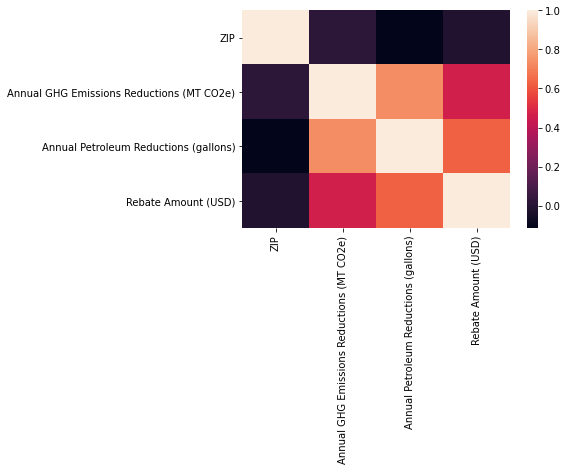

In [10]:
sb.heatmap(df.corr())
plt.show()

In [11]:
makes = df[['Make','Model']].groupby("Make").count()
makes = makes.reset_index()

In [12]:
makes

,Make,Model
0,Audi,173
1,BMW,1502
2,Chevrolet,4141
3,Chrysler,360
4,Ford,2613
5,Honda,2285
6,Hyundai,3235
7,Jaguar,51
8,Jeep,213
9,Kia,1265


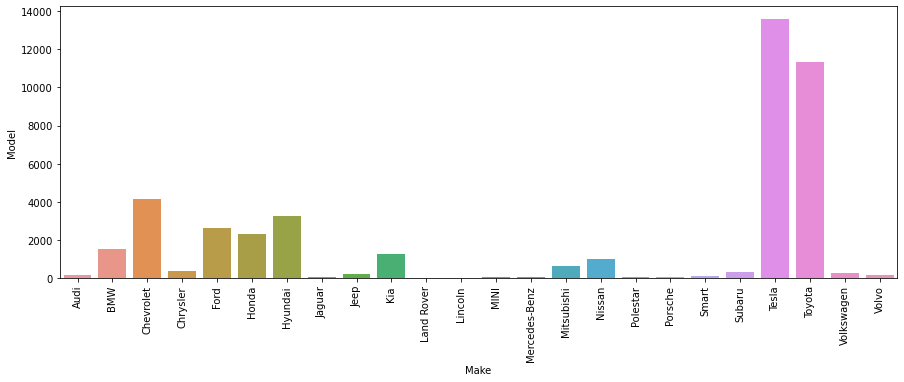

In [13]:

plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)

sb.barplot(y = 'Model', x= 'Make', data = makes)
plt.show()


### I did most of the cleaning using data refinery then reload the new dataset in a new data fram 

In [14]:
# import clean data after using data refinery 
body = client_2387952dfe9d4532b74a49ac81bff132.get_object(Bucket='newyorkstatedriveclean-donotdelete-pr-bmegibwzz00tnm',Key='data_asset/NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data_Beginning_2017_csv_shaped_540hv67l55wdm271qb5l554lq')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Data through Date,Submitted Date,Make,Model,County,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,2021-09-07,2017-01-04,Toyota,Prius Prime,Schoharie,PHEV,Purchase,3.03,440.11,1100
1,2021-09-07,2017-01-04,Toyota,Prius Prime,Suffolk,PHEV,Purchase,3.03,440.11,1100
2,2021-09-07,2017-01-05,Ford,Fusion Energi,Albany,PHEV,Lease,2.26,375.03,1100
3,2021-09-07,2017-01-05,Chevrolet,Bolt,Chemung,BEV,Purchase,3.07,592.89,2000
4,2021-09-07,2017-01-05,Toyota,Prius Prime,Cortland,PHEV,Purchase,3.03,440.11,1100


In [15]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Data through Date                          17197 non-null  object 
 1   Submitted Date                             17197 non-null  object 
 2   Make                                       17197 non-null  object 
 3   Model                                      17197 non-null  object 
 4   County                                     17197 non-null  object 
 5   EV Type                                    17197 non-null  object 
 6   Transaction Type                           17197 non-null  object 
 7   Annual GHG Emissions Reductions (MT CO2e)  17197 non-null  float64
 8   Annual Petroleum Reductions (gallons)      17197 non-null  float64
 9   Rebate Amount (USD)                        17197 non-null  int64  
dtypes: float64(2), int64(1

In [20]:
# Check for duplicates 
df_data_1.duplicated().sum()

5282

In [21]:
# dropping duplicate values
df_data_1.drop_duplicates(keep=False,inplace=True)

In [22]:
df_data_1.describe()

,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
count,9386.000000,9386.000000,9386.000000
mean,2.695502,499.960593,1419.624973
std,0.621727,105.135636,530.815466
min,0.060000,100.890000,500.000000
25%,2.600000,440.110000,1100.000000
50%,2.990000,525.030000,1700.000000
75%,3.030000,592.890000,2000.000000
max,3.310000,592.890000,2000.000000


In [23]:
df_data_1.describe(include= 'object' )

,Data through Date,Submitted Date,Make,Model,County,EV Type,Transaction Type
count,9386,9386,9386,9386,9386,9386,9386
unique,2,563,21,48,62,2,2
top,2021-09-07,2020-08-10,Toyota,Prius Prime,Suffolk,PHEV,Purchase
freq,9385,70,2463,2079,1090,5185,5469


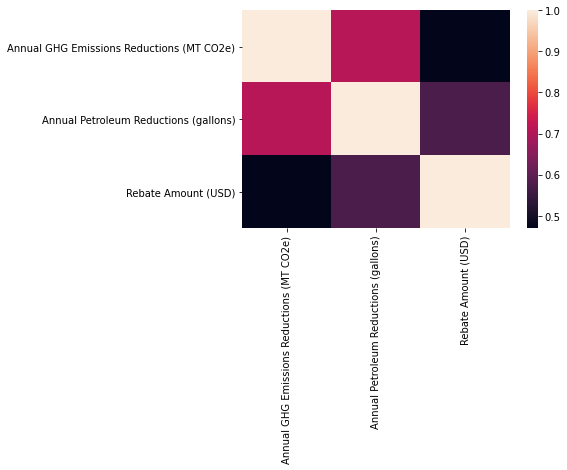

In [24]:
sb.heatmap(df_data_1.corr())
plt.show()

In [25]:
make = df_data_1[['Make','Model']].groupby("Make").count()
make = make.reset_index()

In [26]:
make

,Make,Model
0,Audi,50
1,BMW,355
2,Chevrolet,1200
3,Chrysler,116
4,Ford,559
5,Honda,508
6,Hyundai,755
7,Jaguar,24
8,Kia,356
9,MINI,32


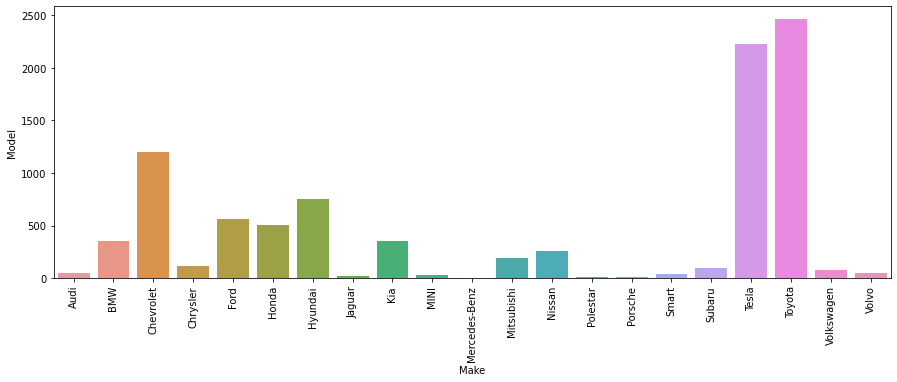

In [28]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)

sb.barplot(y = 'Model', x= 'Make', data = make)
plt.show()

## Univariate Exploration

> In this section, I will investigate distributions of individual variables,
to check unusual points or outliers, and take a deeper look and check relationships between variables.

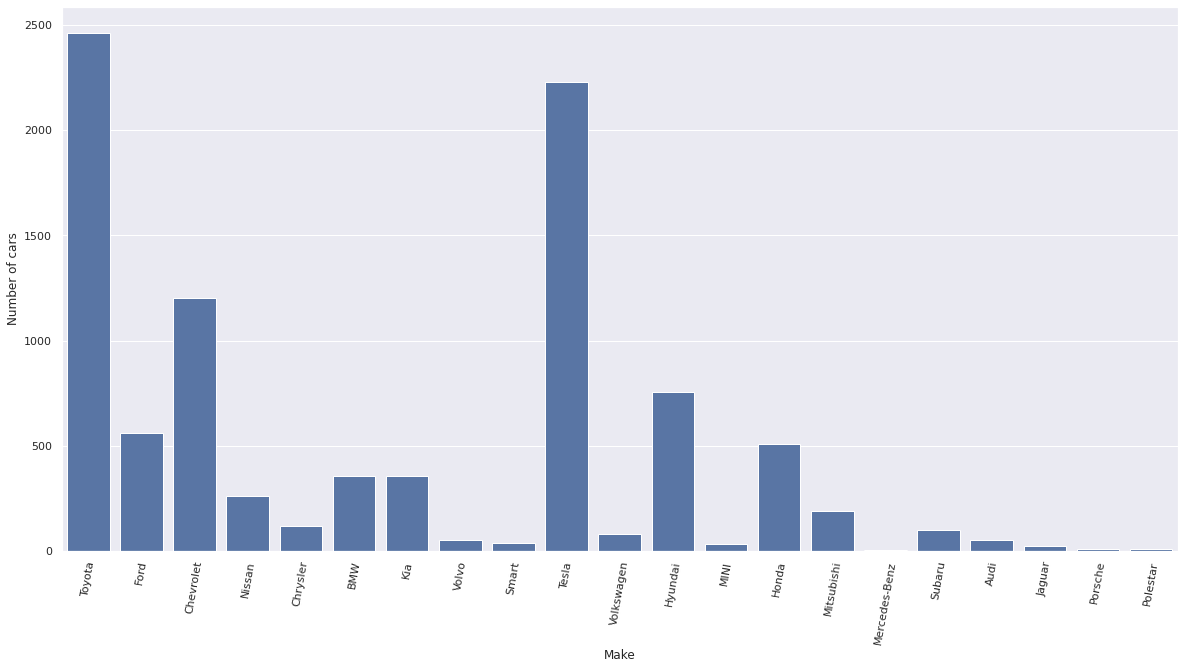

In [47]:
# Ploting Make ditribution 
base_color = sb.color_palette()[0]
sb.countplot(data = df_data_1, x  = 'Make', color = base_color);
sb.set(rc={'figure.figsize':(20,10)})
plt.xlabel('Make')
plt.ylabel('Number of cars');
plt.xticks(rotation= 80);

In [31]:
top_make = df_data_1['Make'].value_counts(ascending = False)[:10]

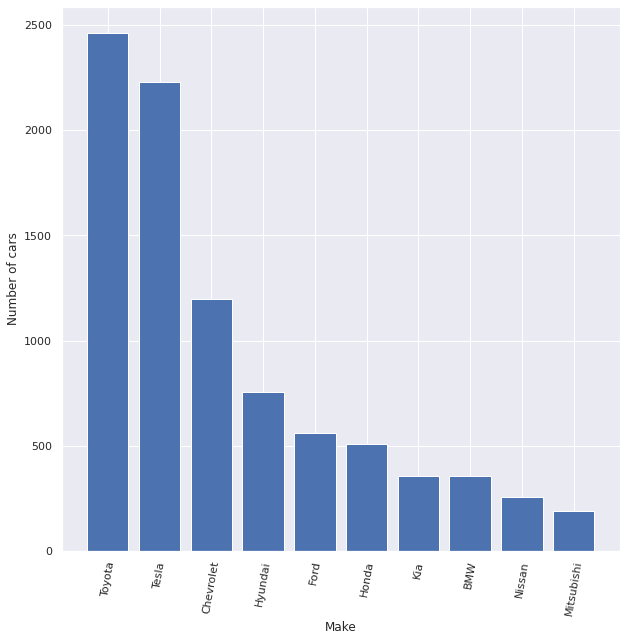

In [34]:
plt.bar(x = top_make.index, height = top_make.values);
sb.set(rc={'figure.figsize':(10,8)})
plt.xlabel('Make')
plt.ylabel('Number of cars');
plt.xticks(rotation= 80);

#### From the above graphs that electric car distribution is right skewed. Also,we found that Toyota, Tesla, and Chevrolet are the most popular make. 

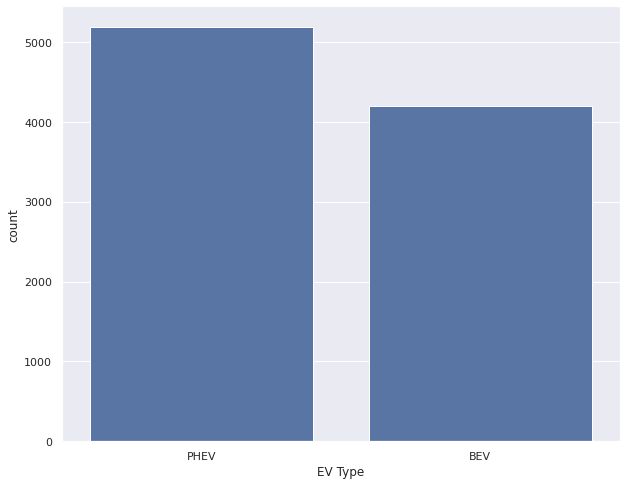

In [35]:
# Ploting EV Type ditribution 
base_color = sb.color_palette()[0]
sb.countplot(data = df_data_1, x  = 'EV Type', color = base_color);

### PHEV: plug-in hybrids usage is slightly higher than BEV: battery electric vehicles.


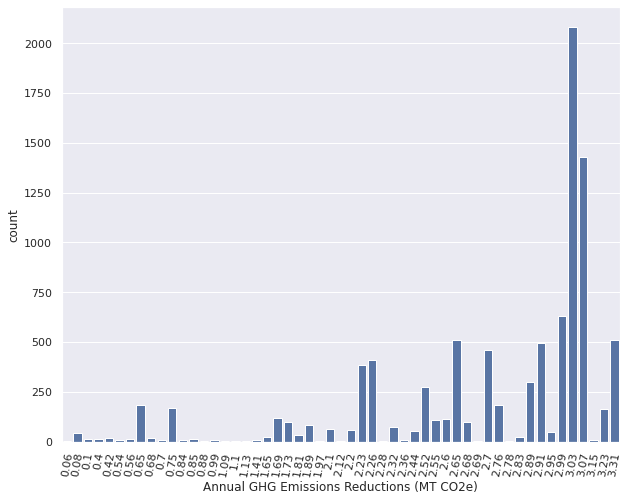

In [36]:
# Ploting Annual GHG Emissions Reductions (MT CO2e) ditribution 
base_color = sb.color_palette()[0]
sb.countplot(data = df_data_1, x  = 'Annual GHG Emissions Reductions (MT CO2e)', color = base_color);
sb.set(rc={'figure.figsize':(20,20)})
plt.xticks(rotation= 80);

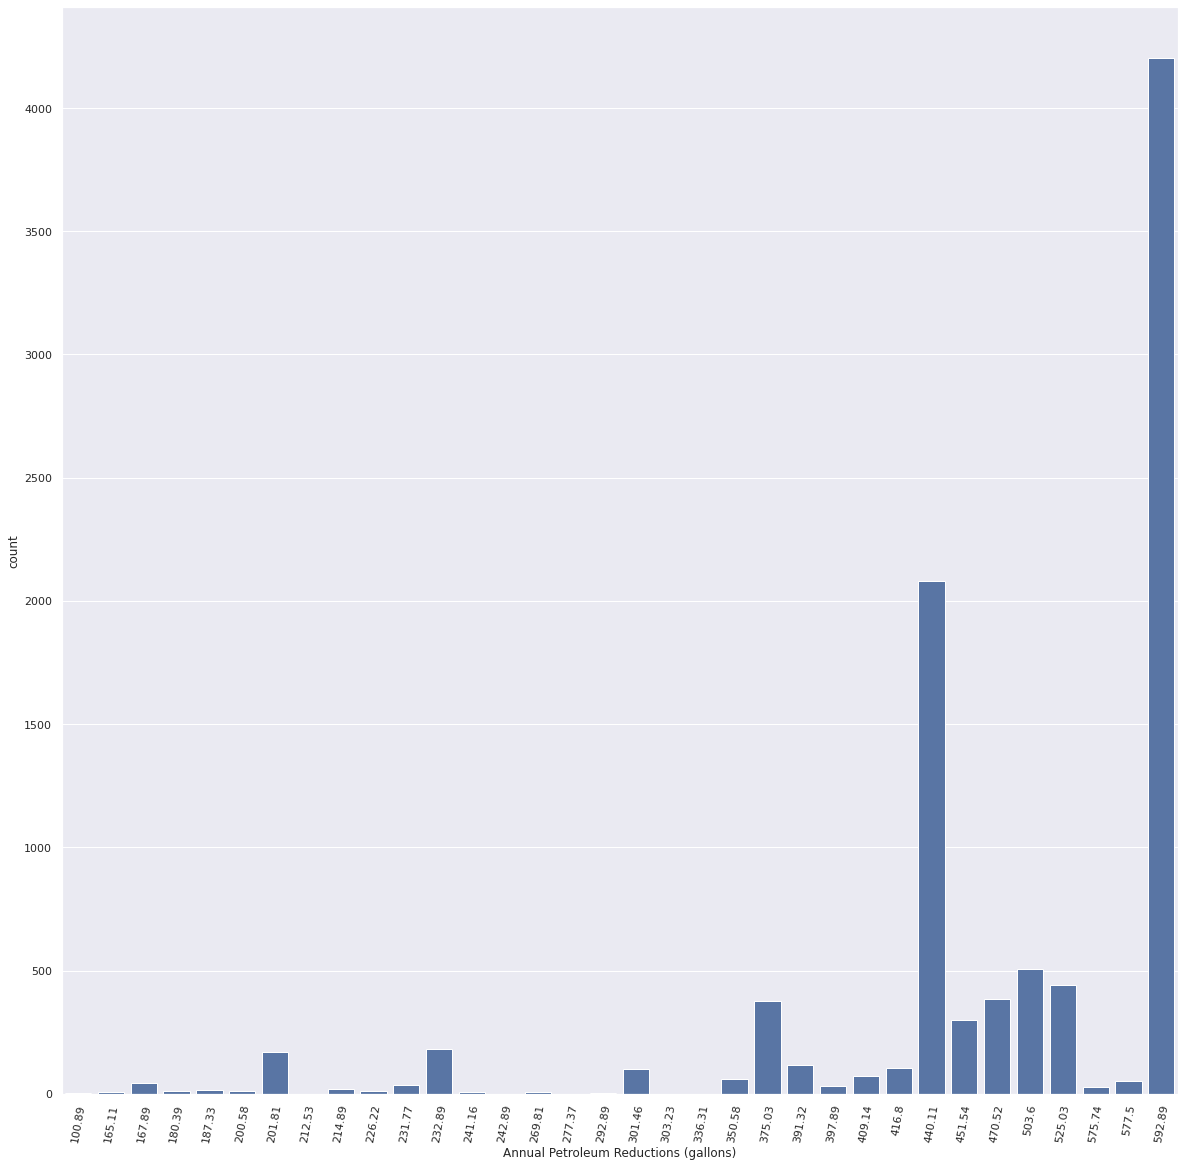

In [37]:
# Ploting Annual Petroleum Reductions (gallons) ditribution 
base_color = sb.color_palette()[0]
sb.countplot(data = df_data_1, x  = 'Annual Petroleum Reductions (gallons)', color = base_color);
sb.set(rc={'figure.figsize':(20,20)})
plt.xticks(rotation= 80);

### Both [Annual GHG Emissions Reductions (MT CO2e)] and [Annual Petroleum Reductions (gallons)] distributions are left skwed

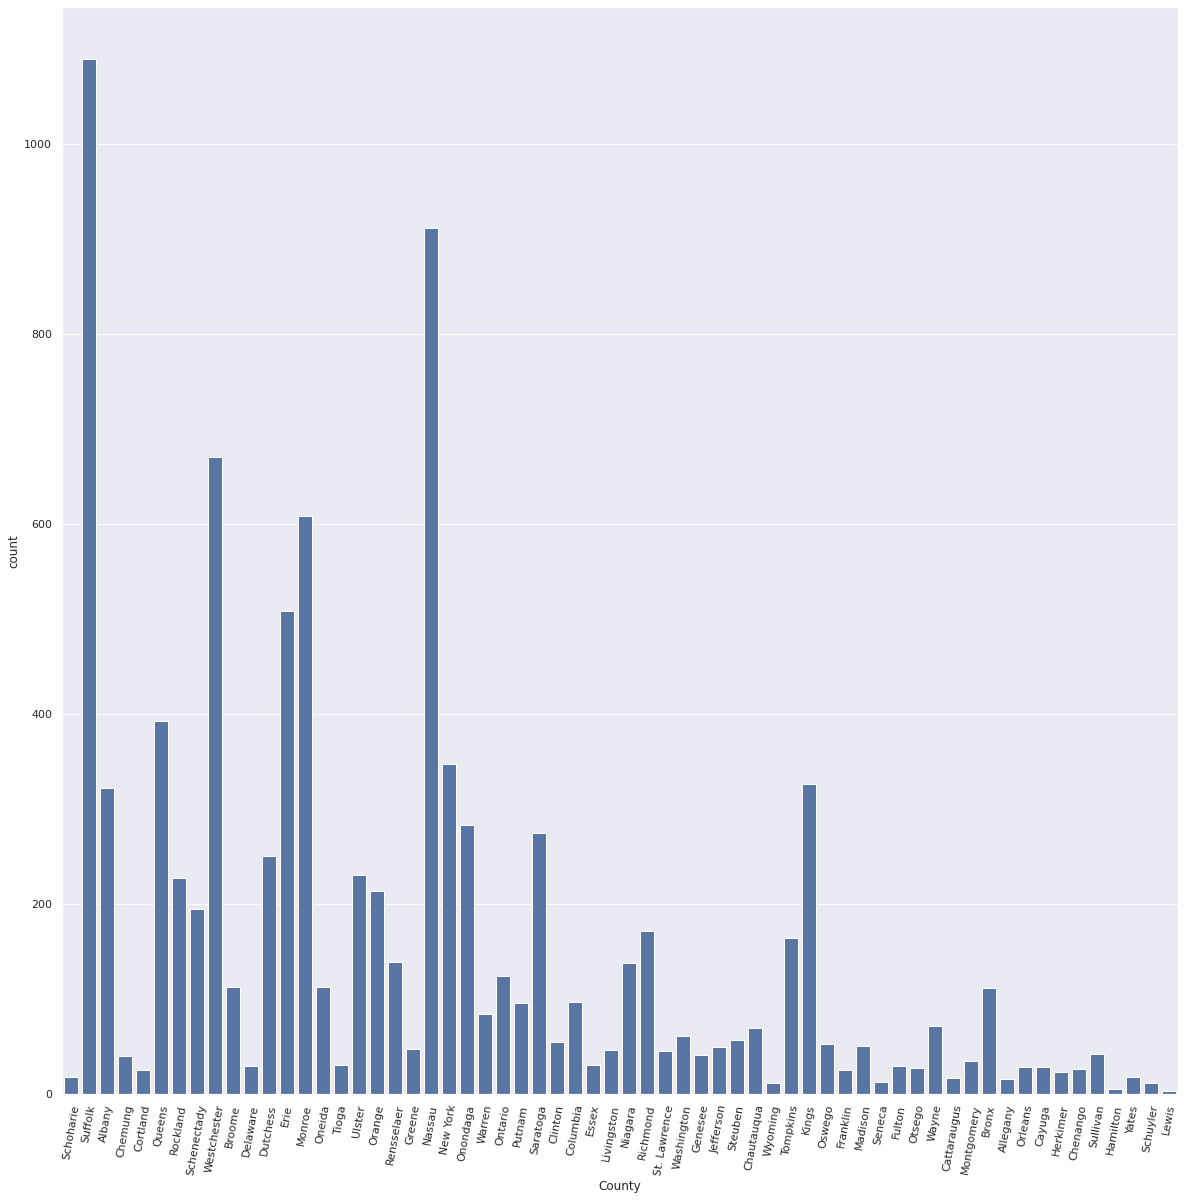

In [38]:
# Ploting county ditribution 
base_color = sb.color_palette()[0]
sb.countplot(data = df_data_1, x  = 'County', color = base_color);
sb.set(rc={'figure.figsize':(20,20)})
plt.xticks(rotation= 80);

In [39]:
top_county = df_data_1['County'].value_counts(ascending = False)[:10]
top_county

Suffolk        1090
Nassau          912
Westchester     671
Monroe          609
Erie            508
Queens          393
New York        347
Kings           326
Albany          322
Onondaga        283
Name: County, dtype: int64

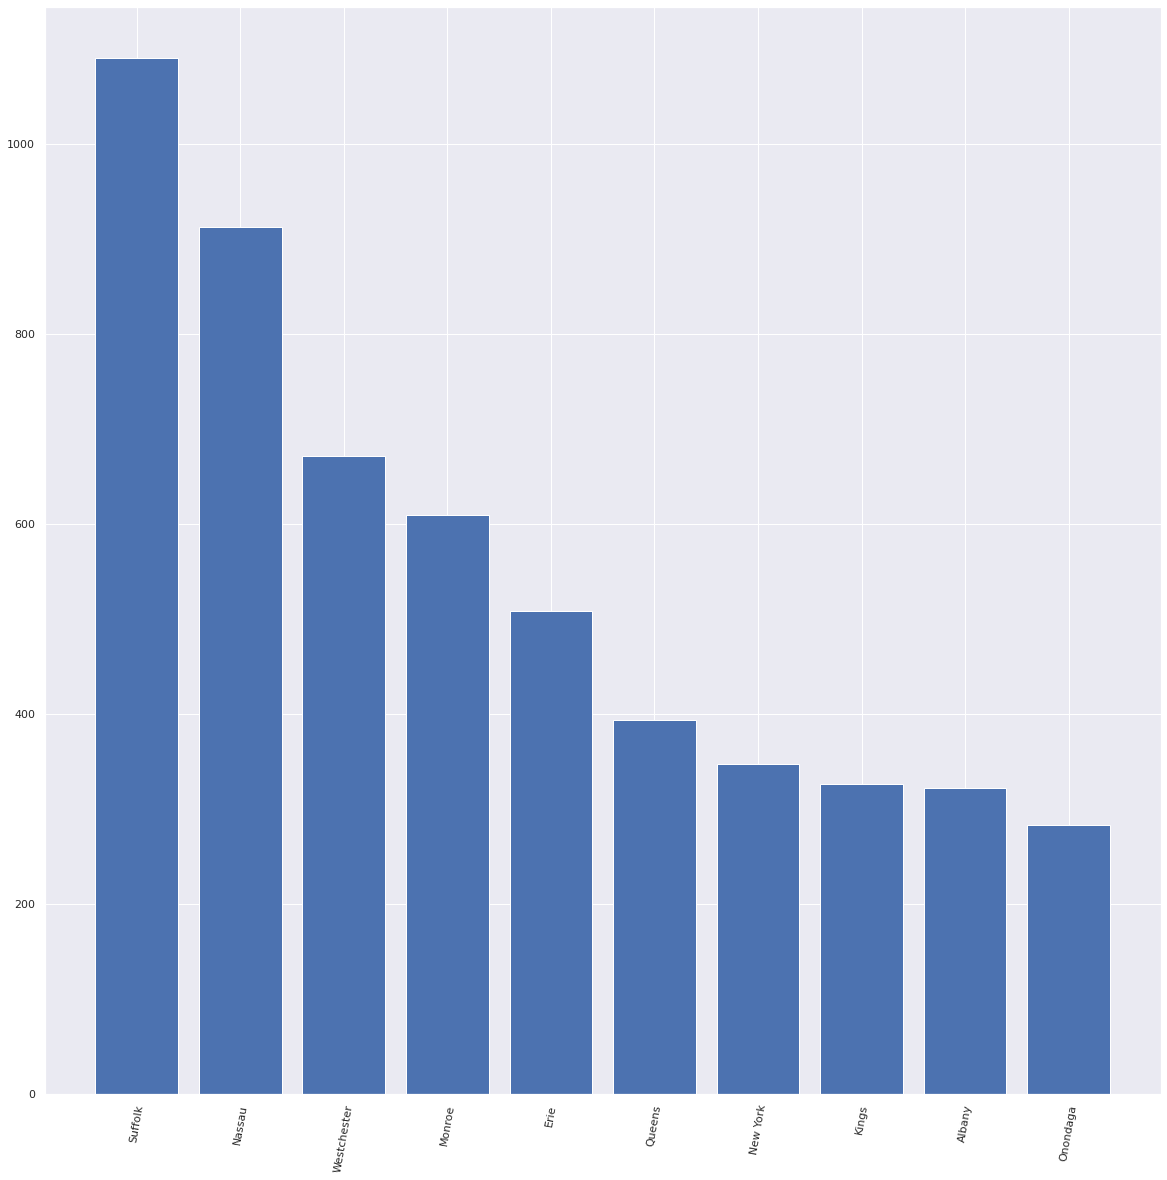

In [40]:
plt.bar(x = top_county.index, height = top_county.values);
sb.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation= 80);

#### From the above graphs we can find that county distribution is skewed to the right, and the counties with most electric cars are Suffolk, Nassau, Westchester, Monroe, Erie, Queens, and New York     


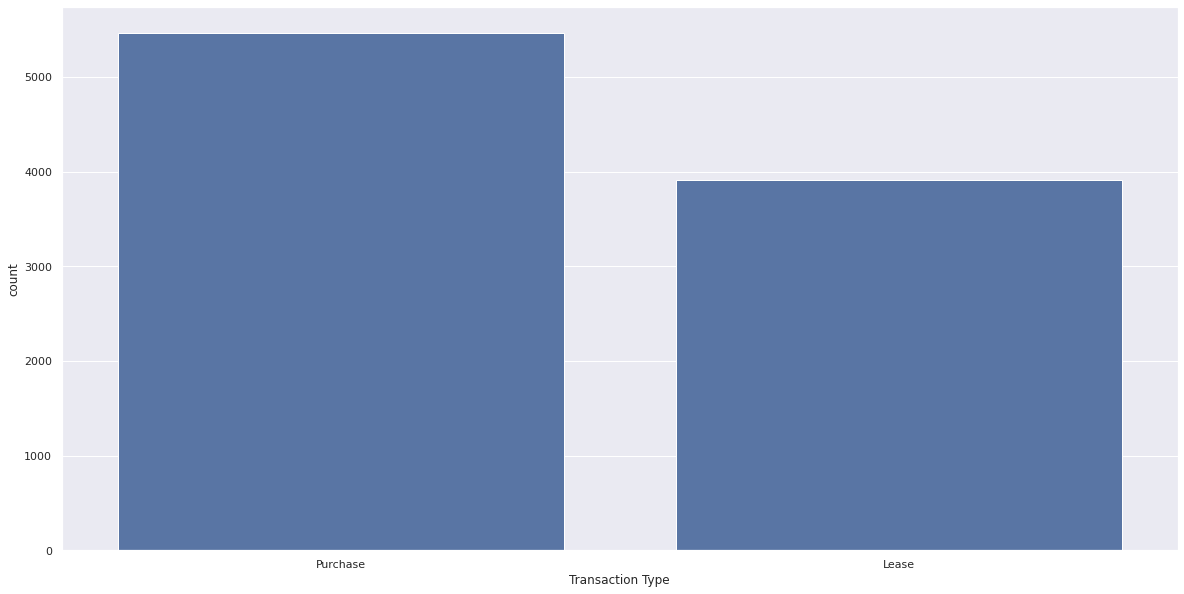

In [41]:
# Ploting Transaction Type ditribution 
base_color = sb.color_palette()[0]
sb.countplot(data = df_data_1, x  = 'Transaction Type', color = base_color);

##### Purchased cars are more than rented cars.

## Bivariate Exploration

>In this section, I will investigate relationships between pairs of variables in dataset. 

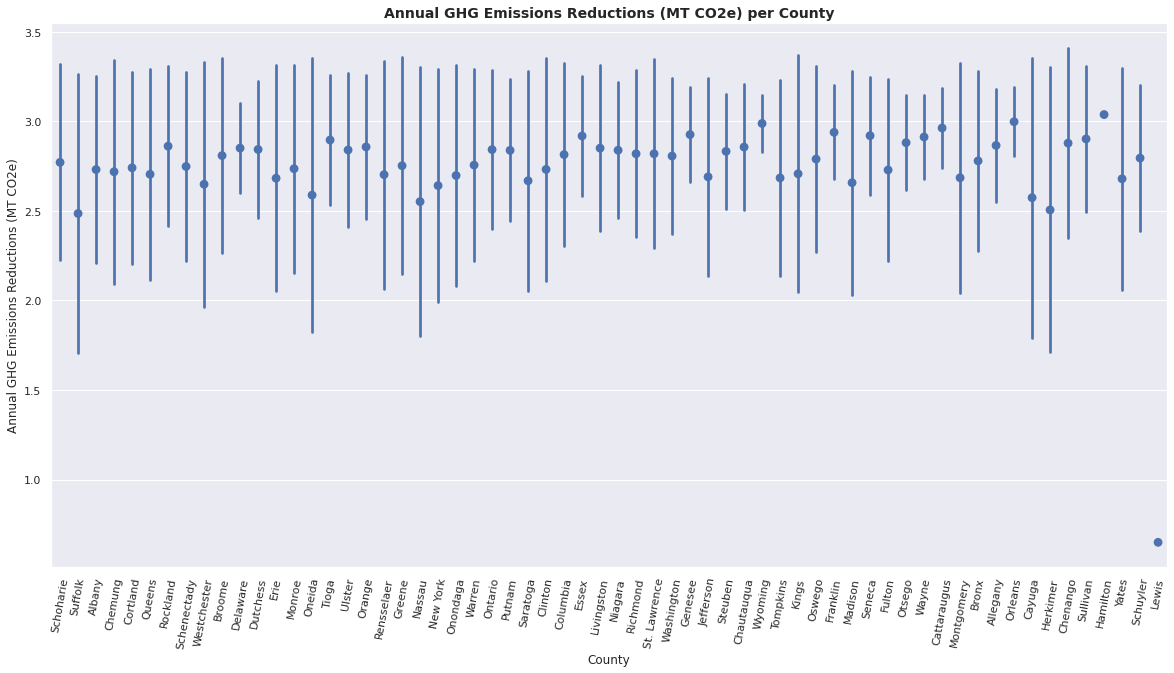

In [45]:
base_color = sb.color_palette()[0]
sb.pointplot(data=df_data_1, x='County', y='Annual GHG Emissions Reductions (MT CO2e)', color=base_color, ci = 'sd', linestyles = "");
sb.set(rc={'figure.figsize':(20,10)})
plt.xlabel('County')
plt.xticks(rotation= 80);
plt.ylabel('Annual GHG Emissions Reductions (MT CO2e)');
plt.title('Annual GHG Emissions Reductions (MT CO2e) per County',fontsize=14, fontweight='bold');

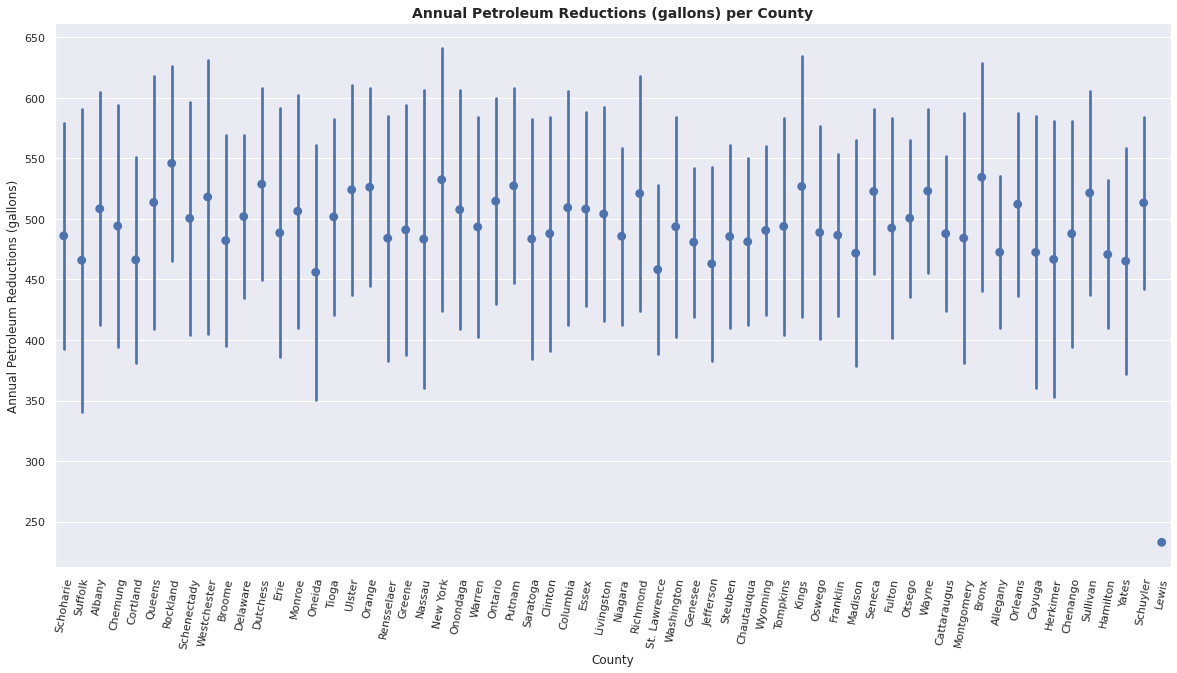

In [44]:
base_color = sb.color_palette()[0]
sb.pointplot(data=df_data_1, x='County', y='Annual Petroleum Reductions (gallons)', color=base_color, ci = 'sd', linestyles = "");
sb.set(rc={'figure.figsize':(20,10)})
plt.xlabel('County')
plt.xticks(rotation= 80);
plt.ylabel('Annual Petroleum Reductions (gallons)');
plt.title('Annual Petroleum Reductions (gallons) per County', fontsize=14, fontweight='bold');

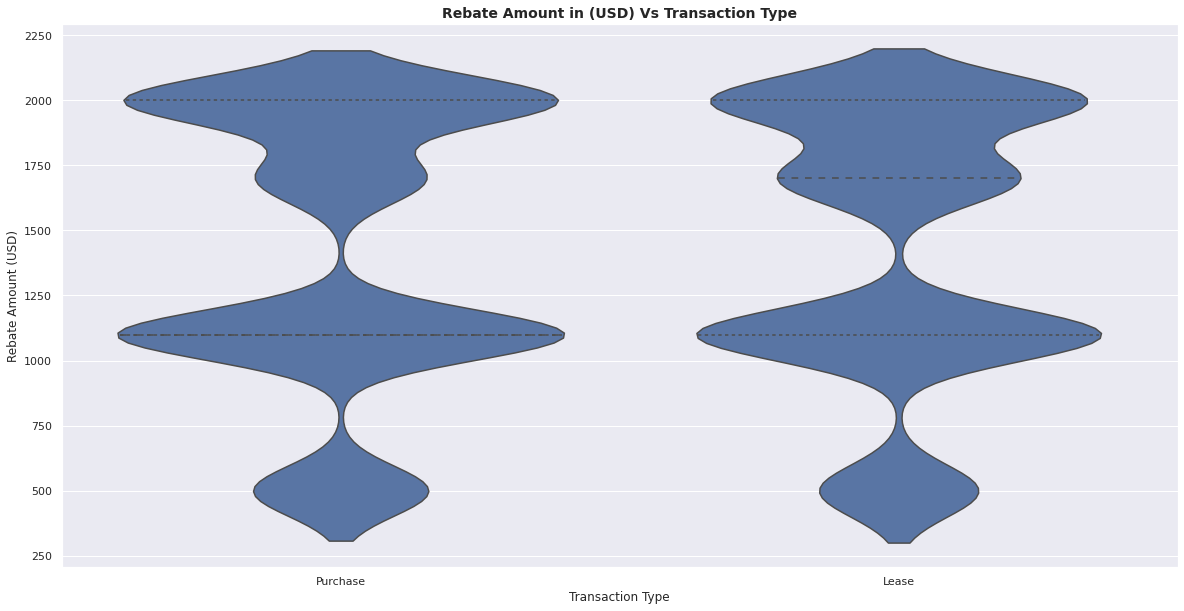

In [46]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df_data_1, x='Transaction Type', y='Rebate Amount (USD)', color=base_color, inner = 'quartile');
plt.xlabel('Transaction Type')
plt.ylabel('Rebate Amount (USD)');
plt.title('Rebate Amount in (USD) Vs Transaction Type', fontsize=14, fontweight='bold');

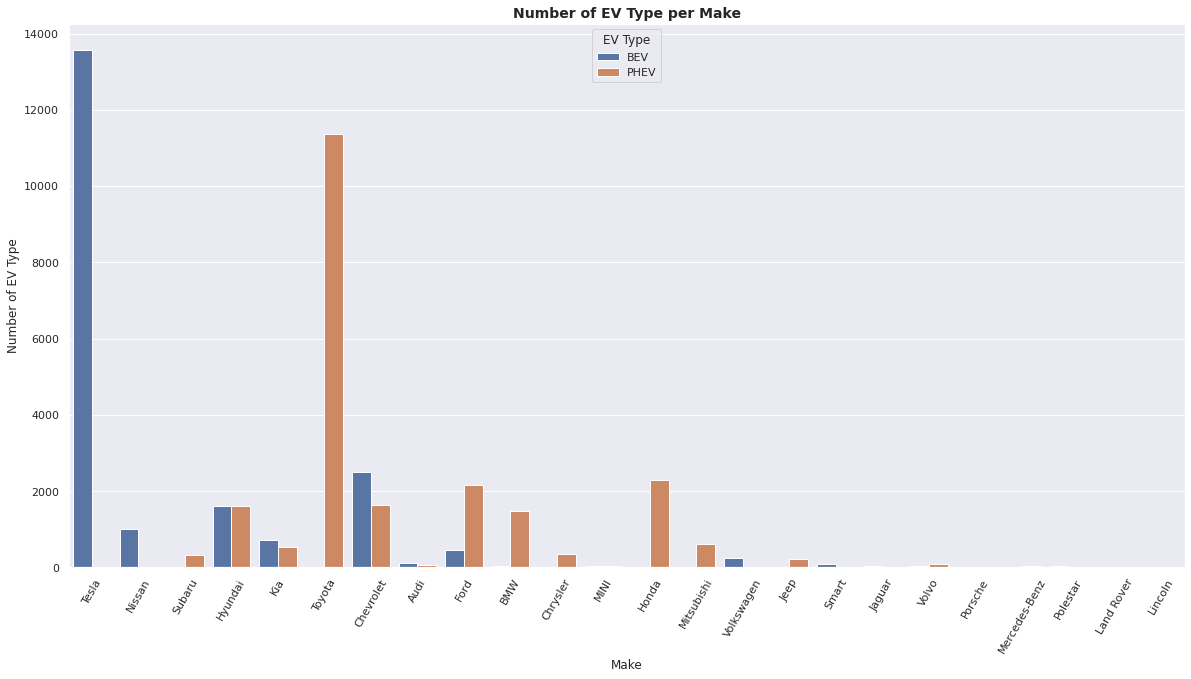

In [48]:
sb.countplot(data=df, x='Make', hue='EV Type');
plt.xlabel('Make');
plt.xticks(rotation= 60);
plt.ylabel('Number of EV Type');
plt.title('Number of EV Type per Make',fontsize=14, fontweight='bold');

#### Tesla is the highest car Make with BEV: battery electric vehicles. 

## Multivariate Exploration

> Creating plots of three or more variables to investigate the dataset furthermore and find more relationships between the variables

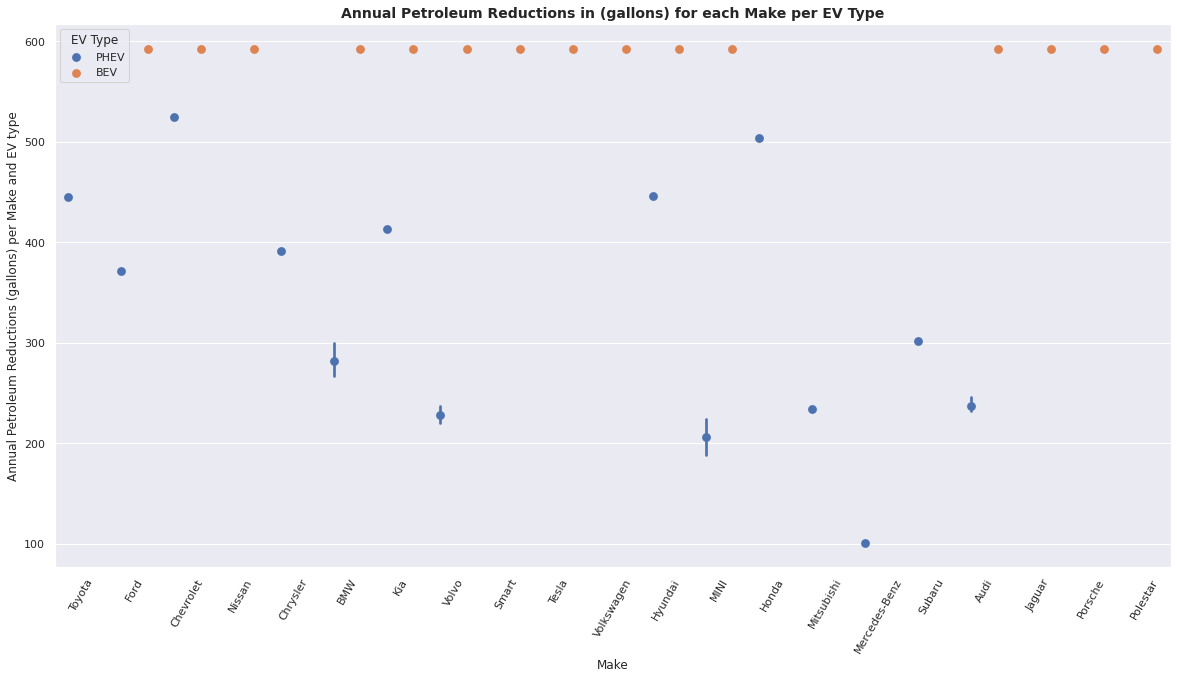

In [49]:
sb.pointplot(data=df_data_1, x='Make', y='Annual Petroleum Reductions (gallons)', hue='EV Type', dodge=0.5, linestyles="");
plt.title('Annual Petroleum Reductions in (gallons) for each Make per EV Type', fontsize=14, fontweight='bold')
plt.xlabel('Make');
plt.xticks(rotation= 60);
plt.ylabel('Annual Petroleum Reductions (gallons) per Make and EV type');

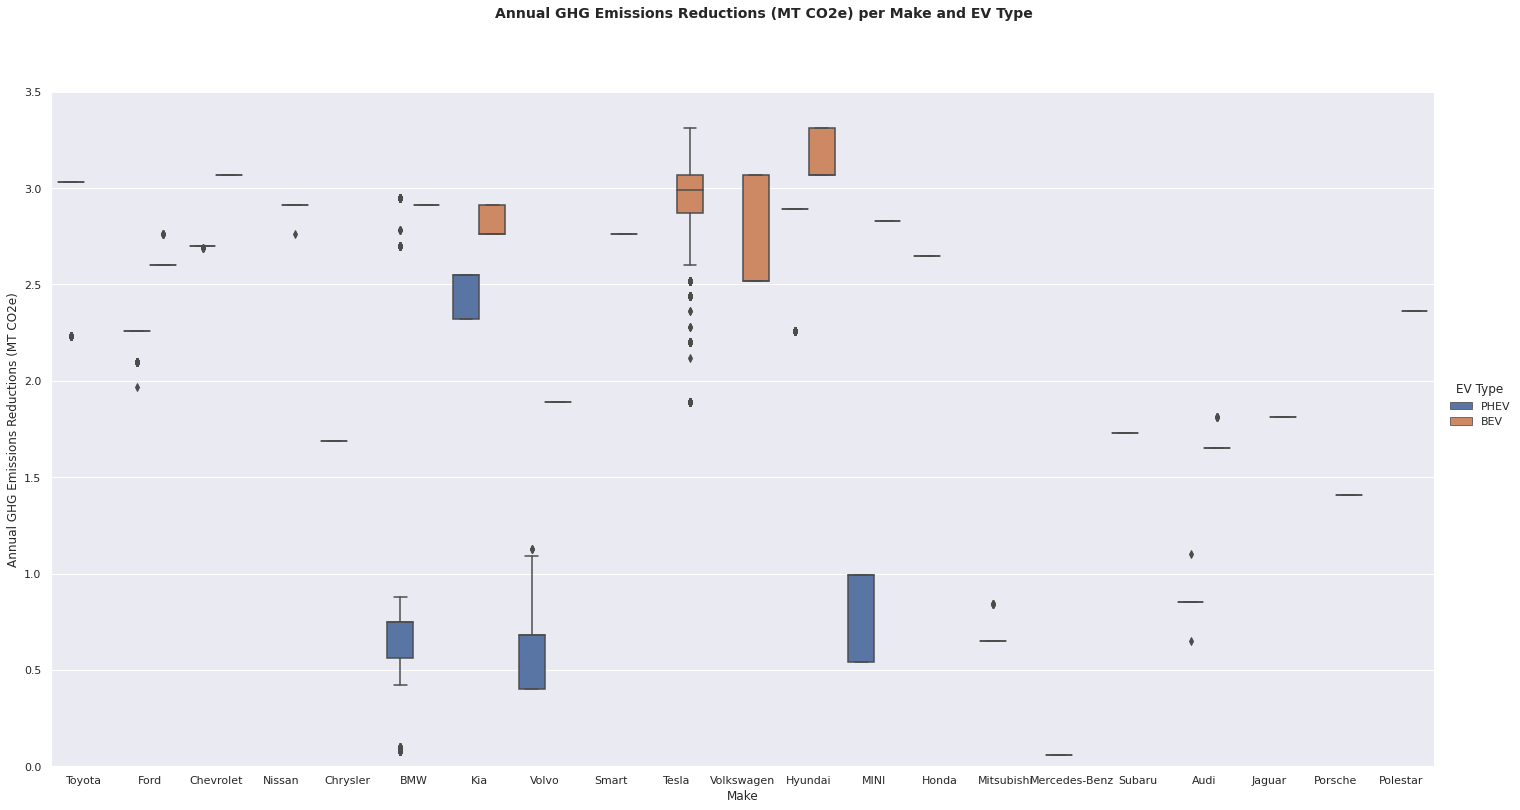

In [50]:
figs1= sb.catplot(data=df_data_1, x='Make', y="Annual GHG Emissions Reductions (MT CO2e)", hue="EV Type", kind="box", height=10, aspect=2)
plt.ylim(0,3.5);
figs1.fig.suptitle('Annual GHG Emissions Reductions (MT CO2e) per Make and EV Type', y=1.1, fontsize=14, fontweight='bold');